In [0]:
# Installing TuriCreate SFrame
!pip install turicreate

**Connect to Kaggle**

In [0]:
# see more details in the course first lecture
!mkdir /root/.kaggle/
import json
import os

# Installing the Kaggle package
!pip install kaggle 

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"", "key":""}  # TODO: REMOVE THIS LINE!!!

# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


# Homework Assignment  6

**Question 1:** Construct a sentiment classifier using 80% of the reviews in the [Amazon Fine Food Reviews dataset](https://www.kaggle.com/snap/amazon-fine-food-reviews).
The classifier needs to predict if a product got a one-star or a five-star review. 
Evaluate the classifier using the rest of the data (30pt). 


In [0]:
# searching for the dataset
DATASET_NAME = 'amffr'
KAGGLE_REPO = 'snap/amazon-fine-food-reviews'
!rm -r ./datasets/$DATASET_NAME/
!mkdir -p ./datasets/$DATASET_NAME/data
!mkdir -p ./datasets/$DATASET_NAME/zip
!mkdir -p ./datasets/$DATASET_NAME/sql
!ls datasets/$DATASET_NAME/data

!kaggle datasets list -s $DATASET_NAME
# download the dataset from Kaggle and unzip it
!kaggle datasets download $KAGGLE_REPO -p ./datasets/$DATASET_NAME/zip
!unzip ./datasets/$DATASET_NAME/zip/*.zip -d ./datasets/$DATASET_NAME/data
!ls ./datasets/$DATASET_NAME/zip/
!ls ./datasets/$DATASET_NAME/data/
!ls ./datasets/$DATASET_NAME/sql/

No datasets found
 96% 233M/242M [00:01<00:00, 197MB/s]
100% 242M/242M [00:01<00:00, 227MB/s]
Archive:  ./datasets/amffr/zip/amazon-fine-food-reviews.zip
  inflating: ./datasets/amffr/data/Reviews.csv  
  inflating: ./datasets/amffr/data/database.sqlite  
  inflating: ./datasets/amffr/data/hashes.txt  
amazon-fine-food-reviews.zip
database.sqlite  hashes.txt  Reviews.csv


In [0]:
import pandas as pd
DATA_PATH = f'./datasets/{DATASET_NAME}/data/Reviews.csv'
df = pd.read_csv(DATA_PATH)
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


**As Michel suggested, I removed reviews with score of 2,3 or 4. Also, we use panadas to read the csv instead of turicreate**

In [0]:
df.drop(['ProfileName', 'Time'], axis=1)
print(f'Total reviewes: {len(df)}')
df = df[(df['Score'] == 1) | (df['Score'] == 5)]
print(f'Total reviewes after filtering by the score 1 and 5: {len(df)}')
df_1 = df[(df['Score'] == 1)]
print(f'Total score 1 reviewes: {len(df_1)}')
df_5 = df[(df['Score'] == 5)]
print(f'Total score 5 reviewes: {len(df_5)}')
df = df.replace({pd.np.nan: None})
df = df[:50000]

Total reviewes: 568454
Total reviewes after filtering by the score 1 and 5: 415390
Total score 1 reviewes: 52268
Total score 5 reviewes: 363122


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  if __name__ == '__main__':


**Let's use turicreate now**

In [0]:
import turicreate as tc

g = tc.SFrame(data=df)
g

Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M.Wassir"" ...",0,0,5
7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5
8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5
9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5
10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5
11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5
12,B0009XLVG0,A2725IB4YY9JEB,"A Poeng ""SparkyGoHome""",4,4,5
13,B0009XLVG0,A327PCT23YH90,LT,1,1,1


**Create features**

In [0]:
g['Text Words'] = tc.text_analytics.count_words(g['Text'])
g['Text Words WSW'] = g['Text Words'].dict_trim_by_keys(tc.text_analytics.stop_words(lang='en'), exclude=True)
g['Summary Words'] = tc.text_analytics.count_words(g['Summary'])
g['Summary Words WSW'] = g['Summary Words'].dict_trim_by_keys(tc.text_analytics.stop_words(lang='en'), exclude=True)
g['Text 1 gram'] = tc.text_analytics.count_ngrams(g['Text'], n=1, method='word')
g['Text 2 grams'] = tc.text_analytics.count_ngrams(g['Text'], n=2, method='word')
g['Text 3 grams'] = tc.text_analytics.count_ngrams(g['Text'], n=3, method='word')
g['Summary 1 gram'] = tc.text_analytics.count_ngrams(g['Summary'], n=1, method='word')
g['Summary 2 grams'] = tc.text_analytics.count_ngrams(g['Summary'], n=2, method='word')
g['Summary 3 grams'] = tc.text_analytics.count_ngrams(g['Summary'], n=3, method='word')
g['Text TF-IDF'] = tc.text_analytics.tf_idf(g['Text'])
g['Summary TF-IDF'] = tc.text_analytics.tf_idf(g['Summary'])
features = [
            'Text Words',
            'Text Words WSW',
            'Summary Words',
            'Summary Words WSW',
            'Text 1 gram',
            'Text 2 grams',
            'Text 3 grams',
            'Summary 1 gram',
            'Summary 2 grams',
            'Summary 3 grams',
            'Text TF-IDF',
            'Summary TF-IDF',
            'Rest',
            'All'
            ]
g.materialize()
g

Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M.Wassir"" ...",0,0,5
7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5
8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5
9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5
10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5
11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5
12,B0009XLVG0,A2725IB4YY9JEB,"A Poeng ""SparkyGoHome""",4,4,5
13,B0009XLVG0,A327PCT23YH90,LT,1,1,1


Create a model

In [0]:
import copy
models = {}
rest_features = ['HelpfulnessNumerator',	'HelpfulnessDenominator']
test, train  = g.random_split(0.2)
for f in features:
  if f == 'Rest':
    models[f] = tc.boosted_trees_classifier.create(train,features=rest_features, target="Score")
  elif f == 'All':
    new_features = copy.deepcopy(features)
    new_features.append('HelpfulnessNumerator')
    new_features.append('HelpfulnessDenominator')
    train_features = list(set(new_features) - set(['Rest', 'All']))
    models[f] = tc.boosted_trees_classifier.create(train,features=train_features, target="Score")
  else:
    models[f] = tc.boosted_trees_classifier.create(train,features=[f], target="Score")

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 38076

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 35689

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.137171     | 0.883654          | 0.880240            | 0.535092          | 0.534891            |

| 2         | 0.268398     | 0.893450          | 0.890220            | 0.444783          | 0.445239            |

| 3         | 0.403749     | 0.892504          | 0.890719            | 0.389678          | 0.389366            |

| 4         | 0.534496     | 0.891349          | 0.889721            | 0.352907          | 0.353724            |

| 5         | 0.669121     | 0.894317          | 0.895210            | 0.326811          | 0.328218            |

| 10        | 1.335353     | 0.901723          | 0.902196            | 0.263020          | 0.271428            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 38076

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 35191

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.089069     | 0.890325          | 0.888224            | 0.537064          | 0.537975            |

| 2         | 0.175066     | 0.892741          | 0.890719            | 0.448041          | 0.450612            |

| 3         | 0.258637     | 0.890850          | 0.891218            | 0.395259          | 0.397697            |

| 4         | 0.346912     | 0.894816          | 0.891218            | 0.361197          | 0.366148            |

| 5         | 0.440868     | 0.894500          | 0.893214            | 0.337644          | 0.343741            |

| 10        | 0.868041     | 0.897101          | 0.891218            | 0.279989          | 0.290745            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 38076

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 9413

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.032103     | 0.894185          | 0.897705            | 0.534194          | 0.532050            |

| 2         | 0.062308     | 0.901040          | 0.902196            | 0.447138          | 0.444220            |

| 3         | 0.091632     | 0.890141          | 0.895709            | 0.395078          | 0.391686            |

| 4         | 0.119378     | 0.890613          | 0.891717            | 0.362151          | 0.357174            |

| 5         | 0.148512     | 0.890797          | 0.891717            | 0.339507          | 0.331940            |

| 10        | 0.284299     | 0.900567          | 0.902695            | 0.287851          | 0.281814            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 38076

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 9013

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.031012     | 0.880791          | 0.885230            | 0.543171          | 0.541661            |

| 2         | 0.055586     | 0.889090          | 0.892715            | 0.461465          | 0.459231            |

| 3         | 0.080991     | 0.885098          | 0.887226            | 0.412588          | 0.409798            |

| 4         | 0.105369     | 0.878743          | 0.884731            | 0.381654          | 0.377944            |

| 5         | 0.129885     | 0.883654          | 0.886727            | 0.361204          | 0.356930            |

| 10        | 0.246343     | 0.892268          | 0.894711            | 0.319384          | 0.317726            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 38076

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 35674

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.141532     | 0.884337          | 0.878743            | 0.534854          | 0.536405            |

| 2         | 0.277002     | 0.892399          | 0.884232            | 0.444726          | 0.447929            |

| 3         | 0.412178     | 0.892793          | 0.888224            | 0.389911          | 0.392618            |

| 4         | 0.554595     | 0.892793          | 0.886727            | 0.353369          | 0.357668            |

| 5         | 0.689217     | 0.894579          | 0.887725            | 0.327757          | 0.333449            |

| 10        | 1.354695     | 0.905636          | 0.894212            | 0.264461          | 0.275991            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 38076

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 538207

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.533519     | 0.886464          | 0.882236            | 0.540604          | 0.542327            |

| 2         | 1.066260     | 0.889353          | 0.884731            | 0.458484          | 0.461625            |

| 3         | 1.580454     | 0.885834          | 0.884232            | 0.408904          | 0.412180            |

| 4         | 2.075529     | 0.887331          | 0.884232            | 0.377615          | 0.381481            |

| 5         | 2.603551     | 0.887304          | 0.885729            | 0.355198          | 0.358758            |

| 10        | 5.194915     | 0.889432          | 0.887226            | 0.306004          | 0.312770            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 38076

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1496946

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 1.045400     | 0.879320          | 0.878244            | 0.545938          | 0.546614            |

| 2         | 2.046886     | 0.882918          | 0.882735            | 0.467636          | 0.467900            |

| 3         | 3.079215     | 0.878007          | 0.874251            | 0.421625          | 0.421829            |

| 4         | 4.135684     | 0.879951          | 0.876747            | 0.393346          | 0.393247            |

| 5         | 5.142406     | 0.882209          | 0.880240            | 0.376050          | 0.376512            |

| 10        | 10.296072    | 0.880686          | 0.877245            | 0.341539          | 0.344716            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 38076

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 9415

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.033266     | 0.893949          | 0.899202            | 0.534371          | 0.531816            |

| 2         | 0.063959     | 0.901986          | 0.908683            | 0.447494          | 0.441679            |

| 3         | 0.092708     | 0.890692          | 0.897206            | 0.394628          | 0.386436            |

| 4         | 0.122514     | 0.889983          | 0.897206            | 0.361082          | 0.352853            |

| 5         | 0.152760     | 0.890430          | 0.896707            | 0.337566          | 0.330335            |

| 10        | 0.299506     | 0.899359          | 0.905689            | 0.286498          | 0.279842            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 38076

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 46179

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.043573     | 0.875854          | 0.868762            | 0.548656          | 0.551396            |

| 2         | 0.079358     | 0.876904          | 0.869262            | 0.472215          | 0.477501            |

| 3         | 0.113876     | 0.875407          | 0.869761            | 0.428288          | 0.434780            |

| 4         | 0.149186     | 0.874908          | 0.868762            | 0.402064          | 0.409729            |

| 5         | 0.186248     | 0.875565          | 0.869761            | 0.385673          | 0.395001            |

| 10        | 0.359978     | 0.876589          | 0.870758            | 0.358027          | 0.370492            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 38076

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 56962

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.040021     | 0.873805          | 0.862774            | 0.550514          | 0.555375            |

| 2         | 0.078090     | 0.874750          | 0.864770            | 0.475484          | 0.483204            |

| 3         | 0.114556     | 0.873280          | 0.863273            | 0.433011          | 0.443185            |

| 4         | 0.151516     | 0.873805          | 0.863273            | 0.408328          | 0.420963            |

| 5         | 0.187295     | 0.874777          | 0.864770            | 0.393771          | 0.408656            |

| 10        | 0.365425     | 0.875013          | 0.864770            | 0.374064          | 0.393386            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 38076

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 103661

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.167043     | 0.882840          | 0.879741            | 0.537526          | 0.537849            |

| 2         | 0.333965     | 0.887304          | 0.886228            | 0.451838          | 0.452857            |

| 3         | 0.501200     | 0.886280          | 0.883733            | 0.399048          | 0.400521            |

| 4         | 0.661453     | 0.885650          | 0.881737            | 0.365428          | 0.368139            |

| 5         | 0.826125     | 0.888670          | 0.884232            | 0.342641          | 0.346414            |

| 10        | 1.653221     | 0.894369          | 0.889222            | 0.282368          | 0.293459            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 38076

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 16310

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.033453     | 0.891900          | 0.886727            | 0.535931          | 0.538245            |

| 2         | 0.064325     | 0.895446          | 0.888723            | 0.450472          | 0.453849            |

| 3         | 0.095663     | 0.885440          | 0.879741            | 0.399513          | 0.404249            |

| 4         | 0.127376     | 0.888749          | 0.884731            | 0.367377          | 0.372343            |

| 5         | 0.158921     | 0.891113          | 0.886228            | 0.346465          | 0.350977            |

| 10        | 0.310183     | 0.893870          | 0.884731            | 0.300690          | 0.310659            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 38076

Number of classes           : 2

Number of feature columns   : 2

Number of unpacked features : 2

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.027007     | 0.887147          | 0.875749            | 0.530337          | 0.536319            |

| 2         | 0.049211     | 0.887120          | 0.875749            | 0.442740          | 0.452491            |

| 3         | 0.071986     | 0.887725          | 0.878743            | 0.391286          | 0.403046            |

| 4         | 0.092884     | 0.888670          | 0.879242            | 0.359734          | 0.374429            |

| 5         | 0.114374     | 0.888670          | 0.879242            | 0.340622          | 0.357020            |

| 10        | 0.214083     | 0.888933          | 0.878743            | 0.312425          | 0.334528            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 38076

Number of classes           : 2

Number of feature columns   : 14

Number of unpacked features : 2388254

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 2.924583     | 0.907133          | 0.903194            | 0.519378          | 0.520538            |

| 2         | 5.753597     | 0.910153          | 0.905689            | 0.424479          | 0.429797            |

| 3         | 8.625374     | 0.907974          | 0.901697            | 0.362532          | 0.369915            |

| 4         | 11.514424    | 0.913226          | 0.905689            | 0.320926          | 0.329850            |

| 5         | 14.434407    | 0.915931          | 0.905190            | 0.290133          | 0.300602            |

| 10        | 28.726342    | 0.923837          | 0.911677            | 0.218900          | 0.234154            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

**The classifier needs to predict if a product got a one-star or a five-star review. Evaluate the classifier using the rest of the data (30pt).**

In [0]:
results = {}
compare = {'Feaure Name' : [], 'Accuracy': [], 'AUC': []}
for feature_name, m in models.items():
  res = m.evaluate(test)
  acc = res['accuracy']
  auc = res['auc']
  compare['Feaure Name'].append(feature_name)
  compare['Accuracy'].append(acc)
  compare['AUC'].append(auc)
  results[feature_name] = res

plot_df = pd.DataFrame.from_dict(compare)
plot_df = plot_df.sort_values(by=['Accuracy', 'AUC'], ascending=False)
plot_df

,Feaure Name,Accuracy,AUC
13,All,0.922379,0.937997
2,Summary Words,0.906351,0.845113
7,Summary 1 gram,0.903629,0.845999
3,Summary Words WSW,0.899496,0.772117
4,Text 1 gram,0.898891,0.893005
0,Text Words,0.897681,0.894368
11,Summary TF-IDF,0.896673,0.810069
1,Text Words WSW,0.895665,0.874037
12,Rest,0.891331,0.754343
5,Text 2 grams,0.888710,0.811203


**Bar Plot for Accuracy and AUC**

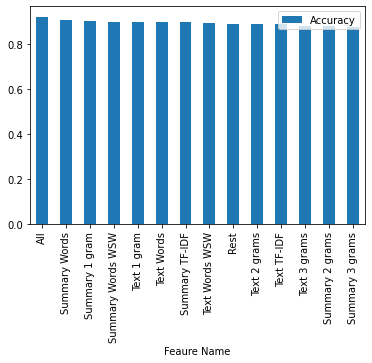

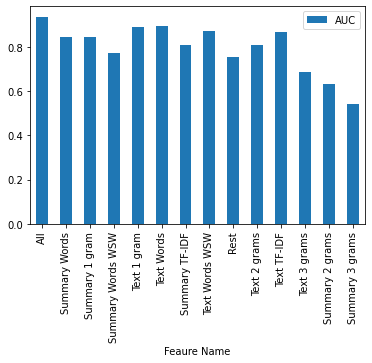

In [0]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plot_df.plot.bar(x='Feaure Name', y='Accuracy')
plot_df.plot.bar(x='Feaure Name', y='AUC')

ROC CURVE

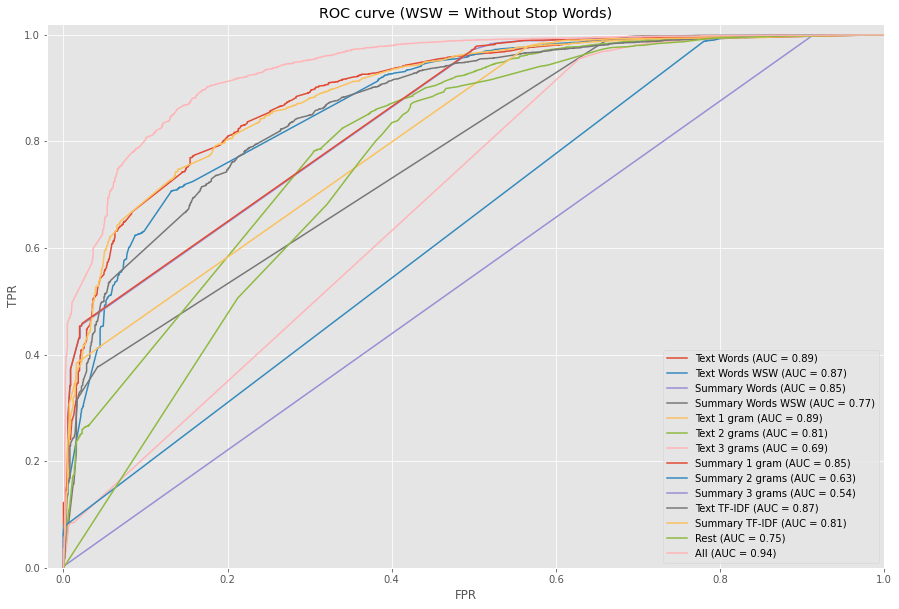

In [0]:
matplotlib.rc('figure', figsize=(15, 10))
plt.style.use('ggplot')
for f_name, result in results.items():
  auc = result['auc']
  plt.plot(result['roc_curve']['fpr'],
          result['roc_curve']['tpr'],
          label=f'{f_name} (AUC = {auc:.2f})')

plt.xlim([-0.02, 1.0])
plt.ylim([0., 1.02])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve (WSW = Without Stop Words)')
plt.legend()
plt.show()

**Question 2:** Construct a sentiment classifier using features from the [TextBlob package](https://textblob.readthedocs.io/en/dev/index.html),
    and from the [affin package](https://pypi.org/project/afinn/). Compare the two classifiers results and visualize it (however you want) (20pt)

In [0]:
!pip install afinn
!pip install textblob

**Add features both to train and test**

In [0]:
from afinn import Afinn
from textblob import TextBlob

afinn = Afinn()
train['Text Afinn'] = train['Text'].apply(lambda t: afinn.score(t))
train['Summary Afinn'] = train['Summary'].apply(lambda t: afinn.score(t))
test['Text Afinn'] = test['Text'].apply(lambda t: afinn.score(t))
test['Summary Afinn'] = test['Summary'].apply(lambda t: afinn.score(t))
       
train['Text TextBlob Polarity'] = train['Text'].apply(lambda review: TextBlob(review).sentiment.polarity)
train['Text TextBlob Subjectivity'] = train['Text'].apply(lambda review: TextBlob(review).sentiment.subjectivity)
train['Summary TextBlob Polarity'] = train['Summary'].apply(lambda review: TextBlob(review).sentiment.polarity)
train['Summary TextBlob Subjectivity'] = train['Summary'].apply(lambda review: TextBlob(review).sentiment.polarity)
test['Text TextBlob Polarity'] = test['Text'].apply(lambda review: TextBlob(review).sentiment.polarity)
test['Text TextBlob Subjectivity'] = test['Text'].apply(lambda review: TextBlob(review).sentiment.polarity)
test['Summary TextBlob Polarity'] = test['Summary'].apply(lambda review: TextBlob(review).sentiment.polarity)
test['Summary TextBlob Subjectivity'] = test['Summary'].apply(lambda review: TextBlob(review).sentiment.polarity)

features_2 = [
            'Text Afinn',
            'Summary Afinn',
            'Text TextBlob Polarity',
            'Summary TextBlob Polarity',
            'Text TextBlob Subjectivity',
            'Summary TextBlob Subjectivity'
            ]
train

Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M.Wassir"" ...",0,0,5
7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5
8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5
10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5
11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5
12,B0009XLVG0,A2725IB4YY9JEB,"A Poeng ""SparkyGoHome""",4,4,5
13,B0009XLVG0,A327PCT23YH90,LT,1,1,1
15,B001GVISJM,A2MUGFV2TDQ47K,"Lynrie ""Oh HELL no""",4,5,5


In [0]:
import copy
models_2 = {}
rest_features = ['HelpfulnessNumerator',	'HelpfulnessDenominator']
for f in features_2:
    models_2[f] = tc.boosted_trees_classifier.create(train,features=[f], target="Score")

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 38076

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.038976     | 0.889248          | 0.874251            | 0.526043          | 0.531988            |

| 2         | 0.059027     | 0.889248          | 0.874750            | 0.436268          | 0.446396            |

| 3         | 0.080331     | 0.889248          | 0.874750            | 0.383042          | 0.396325            |

| 4         | 0.099210     | 0.889248          | 0.874750            | 0.350270          | 0.365988            |

| 5         | 0.121560     | 0.889274          | 0.874251            | 0.329838          | 0.347504            |

| 10        | 0.223092     | 0.889274          | 0.874251            | 0.300006          | 0.322852            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 38076

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.021686     | 0.896444          | 0.906188            | 0.522003          | 0.517786            |

| 2         | 0.041288     | 0.896444          | 0.906188            | 0.429696          | 0.422586            |

| 3         | 0.061980     | 0.896444          | 0.906188            | 0.374361          | 0.365039            |

| 4         | 0.083211     | 0.896444          | 0.906188            | 0.339604          | 0.328510            |

| 5         | 0.103607     | 0.896444          | 0.906188            | 0.317239          | 0.304684            |

| 10        | 0.198143     | 0.896444          | 0.906188            | 0.280266          | 0.263062            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 38076

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.028561     | 0.888618          | 0.885729            | 0.522614          | 0.524541            |

| 2         | 0.051012     | 0.889458          | 0.887725            | 0.430243          | 0.433704            |

| 3         | 0.072974     | 0.889248          | 0.887226            | 0.374579          | 0.379797            |

| 4         | 0.094111     | 0.889274          | 0.887226            | 0.339507          | 0.346325            |

| 5         | 0.117249     | 0.889668          | 0.887725            | 0.316781          | 0.325228            |

| 10        | 0.222323     | 0.889694          | 0.888224            | 0.279073          | 0.292970            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 38076

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.027543     | 0.893555          | 0.893214            | 0.523573          | 0.522956            |

| 2         | 0.048592     | 0.894159          | 0.893713            | 0.431790          | 0.431193            |

| 3         | 0.069361     | 0.894159          | 0.893713            | 0.376762          | 0.375829            |

| 4         | 0.091500     | 0.894185          | 0.893713            | 0.342022          | 0.340715            |

| 5         | 0.116254     | 0.894212          | 0.893713            | 0.319594          | 0.317782            |

| 10        | 0.220242     | 0.894185          | 0.893713            | 0.281019          | 0.277401            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 38076

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.026726     | 0.868290          | 0.858782            | 0.552012          | 0.556719            |

| 2         | 0.048340     | 0.868263          | 0.857784            | 0.477508          | 0.485988            |

| 3         | 0.069576     | 0.868631          | 0.858283            | 0.434905          | 0.447074            |

| 4         | 0.090384     | 0.868605          | 0.858782            | 0.409828          | 0.424489            |

| 5         | 0.113464     | 0.868710          | 0.858782            | 0.394996          | 0.412129            |

| 10        | 0.216861     | 0.868710          | 0.858782            | 0.375343          | 0.400203            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 38076

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.023652     | 0.893397          | 0.894212            | 0.523556          | 0.522404            |

| 2         | 0.043697     | 0.893870          | 0.894711            | 0.431857          | 0.429965            |

| 3         | 0.064050     | 0.894133          | 0.895210            | 0.376815          | 0.374290            |

| 4         | 0.092549     | 0.893555          | 0.893214            | 0.342071          | 0.339046            |

| 5         | 0.114642     | 0.893844          | 0.894711            | 0.319527          | 0.316224            |

| 10        | 0.215916     | 0.894212          | 0.896707            | 0.281087          | 0.276868            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

In [0]:
results_2 = {}
for feature_name, m in models_2.items():
  res = m.evaluate(test)
  acc = res['accuracy']
  auc = res['auc']
  compare['Feaure Name'].append(feature_name)
  compare['Accuracy'].append(acc)
  compare['AUC'].append(auc)
  results[feature_name] = res
  results_2[feature_name] = res

plot_df = pd.DataFrame.from_dict(compare)
plot_df = plot_df.sort_values(by=['Accuracy', 'AUC'], ascending=False)
plot_df

,Feaure Name,Accuracy,AUC
13,All,0.922379,0.937997
2,Summary Words,0.906351,0.845113
15,Summary Afinn,0.903831,0.849932
7,Summary 1 gram,0.903629,0.845999
3,Summary Words WSW,0.899496,0.772117
17,Summary TextBlob Polarity,0.899194,0.851614
19,Summary TextBlob Subjectivity,0.898992,0.851961
4,Text 1 gram,0.898891,0.893005
0,Text Words,0.897681,0.894368
11,Summary TF-IDF,0.896673,0.810069


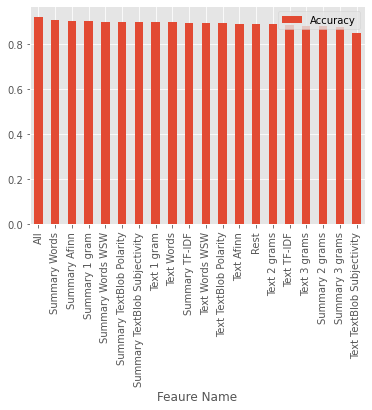

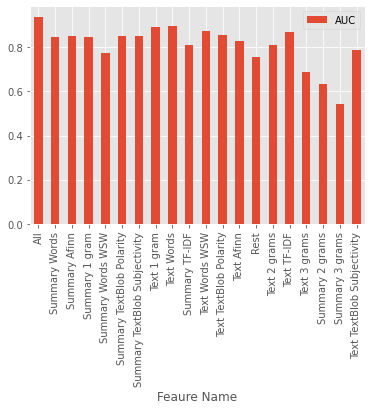

In [0]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plot_df.plot.bar(x='Feaure Name', y='Accuracy')
plot_df.plot.bar(x='Feaure Name', y='AUC')

**Only Afinn and TextBlob**

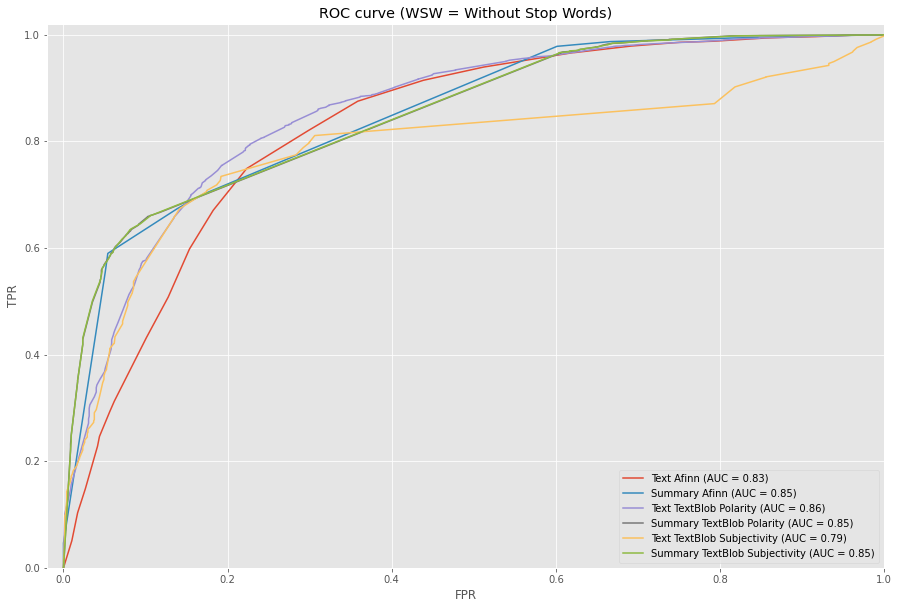

In [0]:
matplotlib.rc('figure', figsize=(15, 10))
plt.style.use('ggplot')
for f_name, result in results_2.items():
  auc = result['auc']
  plt.plot(result['roc_curve']['fpr'],
          result['roc_curve']['tpr'],
          label=f'{f_name} (AUC = {auc:.2f})')

plt.xlim([-0.02, 1.0])
plt.ylim([0., 1.02])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve (WSW = Without Stop Words)')
plt.legend()
plt.show()

**Or all together**

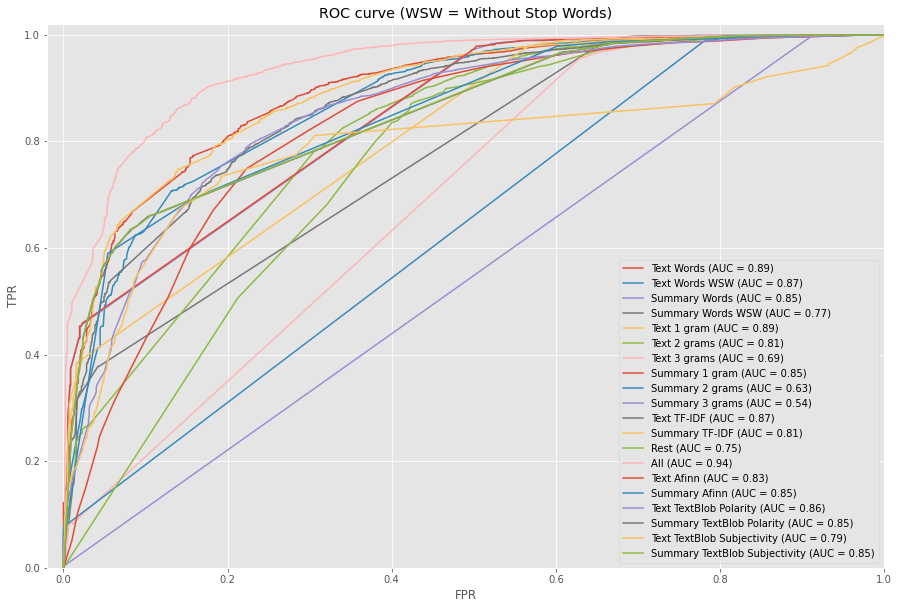

In [0]:
matplotlib.rc('figure', figsize=(15, 10))
plt.style.use('ggplot')
for f_name, result in results.items():
  auc = result['auc']
  plt.plot(result['roc_curve']['fpr'],
          result['roc_curve']['tpr'],
          label=f'{f_name} (AUC = {auc:.2f})')

plt.xlim([-0.02, 1.0])
plt.ylim([0., 1.02])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve (WSW = Without Stop Words)')
plt.legend()
plt.show()

**Question 3:**  Select a different reviews dataset and create a sentiment classifier which utilizes word embeddings (25pt).
Evaluate this classifier (5pt). Try to improve your classifier by adding additional features (20pt)

In [0]:
# searching for the dataset
DATASET_NAME = 'coursera'
KAGGLE_REPO = 'septa97/100k-courseras-course-reviews-dataset'
!rm -r ./datasets/$DATASET_NAME/
!mkdir -p ./datasets/$DATASET_NAME/data
!mkdir -p ./datasets/$DATASET_NAME/zip
!mkdir -p ./datasets/$DATASET_NAME/sql
!ls datasets/$DATASET_NAME/data

!kaggle datasets list -s $DATASET_NAME
# download the dataset from Kaggle and unzip it
!kaggle datasets download $KAGGLE_REPO -p ./datasets/$DATASET_NAME/zip
!unzip ./datasets/$DATASET_NAME/zip/*.zip -d ./datasets/$DATASET_NAME/data
!ls ./datasets/$DATASET_NAME/zip/
!ls ./datasets/$DATASET_NAME/data/
!ls ./datasets/$DATASET_NAME/sql/

rm: cannot remove './datasets/coursera/': No such file or directory
ref                                                    title                                          size  lastUpdated          downloadCount  
-----------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  
mihirs16/coursera-course-data                          Coursera Courses Data                         275KB  2020-01-26 12:51:10            459  
septa97/100k-courseras-course-reviews-dataset          100K Coursera's Course Reviews Dataset         12MB  2018-08-02 03:44:18           2330  
ilknuricke/neurohackinginrimages                       Structural MRI Datasets (T1, T2, FLAIR etc.)  189MB  2019-11-21 00:59:08           3184  
saxenapriyansh/coursera-machine-learning-andrew-ng     Coursera - Machine Learning - Andrew_Ng         4KB  2018-12-25 12:27:33            129  
parulpandey/coursera-ai-global-skills-index-2019-data  Courser

In [0]:
import pandas as pd
DATA_PATH_C = f"./datasets/{DATASET_NAME}/data/reviews.csv"
df_c = pd.read_csv(DATA_PATH_C)
df_c

,Id,Review,Label
0,0,good and interesting,5
1,1,"This class is very helpful to me. Currently, I...",5
2,2,like!Prof and TAs are helpful and the discussi...,5
3,3,Easy to follow and includes a lot basic and im...,5
4,4,Really nice teacher!I could got the point eazl...,4
...,...,...,...
107013,107013,Trendy topic with talks from expertises in the...,4
107014,107014,"Wonderful! Simple and clear language, good ins...",5
107015,107015,an interesting and fun course. thanks. dr quincy,5
107016,107016,"very broad perspective, up to date information...",4


In [0]:
df_c = df_c[df_c['Label'] != 3]
def label2sentiment(label):
    if label >= 4:
        return "Positive"
    else:
        return "Negative"

df_c['sentiment'] = df_c['Label'].apply(lambda label: label2sentiment(label))
df_c

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Id,Review,Label,sentiment
0,0,good and interesting,5,Positive
1,1,"This class is very helpful to me. Currently, I...",5,Positive
2,2,like!Prof and TAs are helpful and the discussi...,5,Positive
3,3,Easy to follow and includes a lot basic and im...,5,Positive
4,4,Really nice teacher!I could got the point eazl...,4,Positive
...,...,...,...,...
107013,107013,Trendy topic with talks from expertises in the...,4,Positive
107014,107014,"Wonderful! Simple and clear language, good ins...",5,Positive
107015,107015,an interesting and fun course. thanks. dr quincy,5,Positive
107016,107016,"very broad perspective, up to date information...",4,Positive


In [0]:
import turicreate as tc
sf = tc.SFrame(df_c)
sf

Id,Review,Label,sentiment
0,good and interesting,5,Positive
1,This class is veryhelpful to me. Curren ...,5,Positive
2,like!Prof and TAs arehelpful and the ...,5,Positive
3,Easy to follow andincludes a lot basic and ...,5,Positive
4,Really nice teacher!Icould got the point ...,4,Positive
5,"Great course - Irecommend it for all, ...",5,Positive
6,One of the most usefulcourse on IT Management! ...,5,Positive
8,Super content. I'lldefinitely re-do the ...,5,Positive
9,One of the excellentcourses at Coursera for ...,5,Positive
10,Is there any reason whyyou should not apply the ...,5,Positive


In [0]:
import spacy
import en_core_web_sm
from tqdm import tqdm
nlp = en_core_web_sm.load()
l = []
for i in tqdm(range(len(sf))):
    text = sf[i]["Review"]
    l.append(nlp(text).vector)
sf['word2vec'] = l 
sf

100%|██████████| 101947/101947 [19:17<00:00, 88.07it/s]


Id,Review,Label,sentiment,word2vec
0,good and interesting,5,Positive,[ 1.47951889e+003.34680885e-01 ...
1,This class is veryhelpful to me. Curren ...,5,Positive,[ 6.26409471e-016.36977553e-01 ...
2,like!Prof and TAs arehelpful and the ...,5,Positive,[-0.05084229 0.57101458-0.08944809 -0.4334501 ...
3,Easy to follow andincludes a lot basic and ...,5,Positive,[-0.68998009 0.32498562-0.89036286 -0.05664911 ...
4,Really nice teacher!Icould got the point ...,4,Positive,[-0.10046157 0.25526410.54782283 0.03712501 ...
5,"Great course - Irecommend it for all, ...",5,Positive,[ 6.71046615e-011.04730189e+00 ...
6,One of the most usefulcourse on IT Management! ...,5,Positive,[ 1.04919076 0.369454621.27444911 1.16633713 ...
8,Super content. I'lldefinitely re-do the ...,5,Positive,[-0.4744786 0.90651059-1.67701721 -1.49276304 ...
9,One of the excellentcourses at Coursera for ...,5,Positive,[-0.02931069 0.174177890.74183047 -0.00798795 ...
10,Is there any reason whyyou should not apply the ...,5,Positive,[-0.44120666 0.34708297-0.39513451 -0.3169623 ...


In [0]:
sf = sf.dropna()
train, test = sf.random_split(0.8)
cls3 = tc.classifier.create(train,features=['word2vec'], target="sentiment")

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: BoostedTreesClassifier, RandomForestClassifier, DecisionTreeClassifier, SVMClassifier, LogisticClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 19162

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 96

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.118410     | 0.955902          | 0.950446            | 0.477956          | 0.481179            |

| 2         | 0.231301     | 0.955224          | 0.951437            | 0.359019          | 0.364125            |

| 3         | 0.352178     | 0.955694          | 0.951437            | 0.285874          | 0.294452            |

| 4         | 0.467357     | 0.955589          | 0.950446            | 0.237076          | 0.249946            |

| 5         | 0.583011     | 0.955641          | 0.952428            | 0.203514          | 0.222325            |

| 10        | 1.173083     | 0.957311          | 0.953419            | 0.128834          | 0.166510            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Random forest classifier:

--------------------------------------------------------

Number of examples          : 19162

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 96

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.092648     | 0.955433          | 0.951437            | 0.222545          | 0.232610            |

| 2         | 0.186652     | 0.954389          | 0.953419            | 0.221298          | 0.231372            |

| 3         | 0.280482     | 0.954389          | 0.952428            | 0.221660          | 0.230456            |

| 4         | 0.363382     | 0.954285          | 0.953419            | 0.221363          | 0.229701            |

| 5         | 0.451173     | 0.954545          | 0.953419            | 0.220822          | 0.229094            |

| 10        | 0.886676     | 0.954337          | 0.952428            | 0.220363          | 0.229093            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 19162

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 96

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.115680     | 0.955902          | 0.950446            | 0.221566          | 0.232803            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

SVM:

--------------------------------------------------------

Number of examples          : 19162

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 96

Number of coefficients    : 97

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 2        | 1.000000  | 0.133187     | 0.953815          | 0.952428            |

| 1         | 8        | 17.000000 | 0.572907     | 0.949953          | 0.946482            |

| 2         | 10       | 16.867066 | 0.770207     | 0.047594          | 0.048563            |

| 3         | 16       | 0.244127  | 1.210033     | 0.953241          | 0.948464            |

| 4         | 17       | 0.305159  | 1.345320     | 0.954076          | 0.952428            |

| 9         | 30       | 1.299945  | 2.512021     | 0.953815          | 0.952428            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

Logistic regression:

--------------------------------------------------------

Number of examples          : 19162

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 96

Number of coefficients      : 97

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.376992     | 0.953867          | 0.952428            |

| 2         | 3        | 0.627938     | 0.953710          | 0.952428            |

| 3         | 4        | 0.871835     | 0.953867          | 0.952428            |

| 4         | 5        | 1.118319     | 0.954128          | 0.951437            |

| 5         | 6        | 1.366290     | 0.954024          | 0.950446            |

| 8         | 9        | 2.100068     | 0.953971          | 0.950446            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: BoostedTreesClassifier          : 0.9534192269573836
PROGRESS: RandomForestClassifier          : 0.9524281466798811
PROGRESS: DecisionTreeClassifier          : 0.9504459861248761
PROGRESS: SVMClassifier                   : 0.9524281466798811
PROGRESS: LogisticClassifier              : 0.9504459861248761
PROGRESS: ---------------------------------------------
PROGRESS: Selecting BoostedTreesClassifier based on validation set performance.


**Evaluate this classifier (5pt)**

In [0]:
cls3.evaluate(test)

{'accuracy': 0.9537272549403248,
 'auc': 0.799326009812031,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |   Positive   |     Negative    |   28  |
 |   Negative   |     Negative    |   32  |
 |   Negative   |     Positive    |  3756 |
 |   Positive   |     Positive    | 77960 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.9763061664078546,
 'log_loss': 0.16329694366067457,
 'precision': 0.9540359293161682,
 'recall': 0.9996409704057034,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+-----+-----+-------+------+
 | threshold | fpr | tpr |   p   |  n   |
 +-----------+-----+-----+-------+------+
 |    0.0    | 1.0 | 1.0 | 77988 | 3788 |
 |   1e-05   | 1.0 | 1.0 | 77988 | 3788 |
 |   2e-05   |

**Try to improve your classifier by adding additional features (20pt)**

In [0]:
train['Text Words'] = tc.text_analytics.count_words(train['Review'])
train['Text Words WSW'] = train['Text Words'].dict_trim_by_keys(tc.text_analytics.stop_words(lang='en'), exclude=True)
train['Text 1 gram'] = tc.text_analytics.count_ngrams(train['Review'], n=1, method='word')
train['Text 2 grams'] = tc.text_analytics.count_ngrams(train['Review'], n=2, method='word')
train['Text 3 grams'] = tc.text_analytics.count_ngrams(train['Review'], n=3, method='word')
train['Text TF-IDF'] = tc.text_analytics.tf_idf(train['Review'])
afinn = Afinn()
train['Text Afinn'] = train['Review'].apply(lambda t: afinn.score(t))
train['Text TextBlob Polarity'] = train['Review'].apply(lambda review: TextBlob(review).sentiment.polarity)
train['Text TextBlob Subjectivity'] = train['Review'].apply(lambda review: TextBlob(review).sentiment.subjectivity)

test['Text Words'] = tc.text_analytics.count_words(test['Review'])
test['Text Words WSW'] = test['Text Words'].dict_trim_by_keys(tc.text_analytics.stop_words(lang='en'), exclude=True)
test['Text 1 gram'] = tc.text_analytics.count_ngrams(test['Review'], n=1, method='word')
test['Text 2 grams'] = tc.text_analytics.count_ngrams(test['Review'], n=2, method='word')
test['Text 3 grams'] = tc.text_analytics.count_ngrams(test['Review'], n=3, method='word')
test['Text TF-IDF'] = tc.text_analytics.tf_idf(test['Review'])
test['Text Afinn'] = test['Review'].apply(lambda t: afinn.score(t))
test['Text TextBlob Polarity'] = test['Review'].apply(lambda review: TextBlob(review).sentiment.polarity)
test['Text TextBlob Subjectivity'] = test['Review'].apply(lambda review: TextBlob(review).sentiment.polarity)

features = [
            'word2vec',
            'Text Afinn',
            'Text TextBlob Polarity',
            'Text TextBlob Subjectivity',
            'Text Words',
            'Text Words WSW',
            'Text 1 gram',
            'Text 2 grams',
            'Text 3 grams',
            'Text TF-IDF',
            'All'
            ]
train

Id,Review,Label,sentiment,word2vec,Text Words
8,Super content. I'lldefinitely re-do the ...,5,Positive,[-0.4744786 0.90651059-1.67701721 -1.49276304 ...,"{'course': 1.0, 're':1.0, 'definitely': 1.0, ..."
11,Excellent course andteachers. ...,5,Positive,[-0.25366396 1.03885317-0.33958173 -0.29277092 ...,"{'congratulations': 1.0,'teachers': 1.0, 'and': ..."
12,This is a good course foran CIO in a non techn ...,5,Positive,[ 0.2614291 0.482231890.82011288 0.63543117 ...,"{'company': 1.0,'technical': 1.0, 'th ..."
15,Program demystifies theevolving world of CIO ...,4,Positive,[-0.05787166 0.38050887-0.48709226 -0.16921589 ...,"{'review': 1.0, 'audit':1.0, 'requires': 1.0, ..."
20,"Great piece of work, Iespecially liked a few ...",5,Positive,[-0.10453641 -0.105743040.06476981 -0.04905248 ...,"{'the': 1.0, 'for': 1.0,'great': 1.0, 'piece': ..."
25,Great course informationand content ! Very ...,4,Positive,[-0.19145793 0.448619160.06525213 -0.82802469 ...,"{'work': 1.0, 'quality':1.0, 'the': 1.0, 'of': ..."
28,This has been anphenomenal course on the ...,5,Positive,[-0.36122572 0.1939034-0.23384383 -0.66684473 ...,"{'knowledge': 1.0,'ontario': 1.0, 'and': ..."
30,Well-presented contentswith comprehensive ...,5,Positive,[-0.26685867 0.66607964-0.32915244 -0.35600421 ...,"{'lectures': 1.0,'handy': 1.0, 'access': ..."
32,Good quality.,5,Positive,[ 0.67622519 0.03480591-0.85975432 1.19991863 ...,"{'quality': 1.0, 'good':1.0} ..."
40,Excellent course. Icompletely enjoyed it. ...,5,Positive,[-0.44956732 1.4204706-1.0057826 -1.02636778 ...,"{'team': 1.0,'excellent': 1.0, ..."


In [0]:
import copy
models = {}
for f in features:
  if f == 'All':
    new_features = copy.deepcopy(features)
    train_features = list(set(new_features) - set(['Rest', 'All']))
    models[f] = tc.boosted_trees_classifier.create(train,features=train_features, target="sentiment")
  else:
    models[f] = tc.boosted_trees_classifier.create(train,features=[f], target="sentiment")

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 19162

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 96

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.116029     | 0.955172          | 0.958375            | 0.478597          | 0.477571            |

| 2         | 0.235752     | 0.954650          | 0.960357            | 0.360065          | 0.359190            |

| 3         | 0.348326     | 0.955067          | 0.959366            | 0.286948          | 0.284320            |

| 4         | 0.466661     | 0.955015          | 0.961348            | 0.238187          | 0.234654            |

| 5         | 0.590418     | 0.955224          | 0.961348            | 0.205015          | 0.201731            |

| 10        | 1.169574     | 0.956998          | 0.960357            | 0.131251          | 0.138264            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 19162

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.017057     | 0.959242          | 0.964321            | 0.473463          | 0.470518            |

| 2         | 0.028802     | 0.959242          | 0.964321            | 0.353513          | 0.348807            |

| 3         | 0.040620     | 0.959242          | 0.964321            | 0.279876          | 0.273886            |

| 4         | 0.051983     | 0.959242          | 0.964321            | 0.232356          | 0.225401            |

| 5         | 0.063225     | 0.959242          | 0.964321            | 0.200955          | 0.193198            |

| 10        | 0.112207     | 0.959242          | 0.964321            | 0.146689          | 0.137184            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 19162

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.014230     | 0.959503          | 0.971259            | 0.472255          | 0.467141            |

| 2         | 0.025581     | 0.959764          | 0.970268            | 0.351250          | 0.342729            |

| 3         | 0.038335     | 0.959660          | 0.970268            | 0.276467          | 0.265624            |

| 4         | 0.049798     | 0.959555          | 0.970268            | 0.227716          | 0.214750            |

| 5         | 0.060865     | 0.959660          | 0.970268            | 0.194983          | 0.180438            |

| 10        | 0.117799     | 0.960077          | 0.971259            | 0.133669          | 0.115426            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 19162

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.014283     | 0.953554          | 0.959366            | 0.482571          | 0.478942            |

| 2         | 0.027644     | 0.953502          | 0.959366            | 0.368346          | 0.362537            |

| 3         | 0.040365     | 0.953502          | 0.959366            | 0.299157          | 0.291309            |

| 4         | 0.052831     | 0.953502          | 0.959366            | 0.255457          | 0.246151            |

| 5         | 0.065009     | 0.953502          | 0.959366            | 0.227411          | 0.216738            |

| 10        | 0.122823     | 0.953502          | 0.959366            | 0.181120          | 0.167812            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 19162

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 14104

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.042848     | 0.961956          | 0.955401            | 0.471732          | 0.473945            |

| 2         | 0.082851     | 0.962687          | 0.954410            | 0.349494          | 0.355138            |

| 3         | 0.121938     | 0.963208          | 0.956392            | 0.272942          | 0.277675            |

| 4         | 0.162544     | 0.963835          | 0.957384            | 0.222105          | 0.227993            |

| 5         | 0.202011     | 0.963469          | 0.957384            | 0.187682          | 0.194296            |

| 10        | 0.391173     | 0.966392          | 0.959366            | 0.118190          | 0.129279            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 19162

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 13726

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.031175     | 0.960547          | 0.960357            | 0.475816          | 0.475428            |

| 2         | 0.056052     | 0.959712          | 0.962339            | 0.356432          | 0.357112            |

| 3         | 0.082356     | 0.961278          | 0.958375            | 0.282923          | 0.284428            |

| 4         | 0.109181     | 0.962373          | 0.959366            | 0.234375          | 0.238747            |

| 5         | 0.136921     | 0.961121          | 0.960357            | 0.201645          | 0.207171            |

| 10        | 0.260834     | 0.962217          | 0.960357            | 0.137953          | 0.154556            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 19162

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 14145

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.040544     | 0.962113          | 0.946482            | 0.471447          | 0.478744            |

| 2         | 0.078999     | 0.961852          | 0.943508            | 0.349459          | 0.361787            |

| 3         | 0.122908     | 0.963417          | 0.948464            | 0.272698          | 0.289107            |

| 4         | 0.161336     | 0.964670          | 0.950446            | 0.221830          | 0.240957            |

| 5         | 0.199954     | 0.964931          | 0.949455            | 0.186859          | 0.209547            |

| 10        | 0.386728     | 0.967592          | 0.952428            | 0.116395          | 0.148073            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 19162

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 133425

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.088112     | 0.959242          | 0.966303            | 0.477435          | 0.472847            |

| 2         | 0.167293     | 0.959660          | 0.967294            | 0.358549          | 0.352215            |

| 3         | 0.239413     | 0.958720          | 0.963330            | 0.285936          | 0.278793            |

| 4         | 0.318554     | 0.959242          | 0.965312            | 0.238885          | 0.232191            |

| 5         | 0.394997     | 0.958929          | 0.961348            | 0.207223          | 0.198915            |

| 10        | 0.796457     | 0.959868          | 0.964321            | 0.145683          | 0.139418            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 19162

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 283258

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.134755     | 0.956946          | 0.953419            | 0.479207          | 0.481598            |

| 2         | 0.266399     | 0.956581          | 0.952428            | 0.362889          | 0.367475            |

| 3         | 0.404580     | 0.956789          | 0.952428            | 0.291892          | 0.299218            |

| 4         | 0.534317     | 0.956320          | 0.952428            | 0.246671          | 0.255968            |

| 5         | 0.673596     | 0.956059          | 0.951437            | 0.217099          | 0.228766            |

| 10        | 1.325765     | 0.956529          | 0.951437            | 0.166056          | 0.186608            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 19162

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 27989

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.044446     | 0.962165          | 0.963330            | 0.472176          | 0.471214            |

| 2         | 0.088240     | 0.961225          | 0.965312            | 0.350577          | 0.346788            |

| 3         | 0.135233     | 0.963156          | 0.965312            | 0.274587          | 0.271620            |

| 4         | 0.180689     | 0.963104          | 0.962339            | 0.224754          | 0.220929            |

| 5         | 0.221759     | 0.963939          | 0.963330            | 0.190875          | 0.186188            |

| 10        | 0.426612     | 0.964357          | 0.963330            | 0.121961          | 0.123144            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 19162

Number of classes           : 2

Number of feature columns   : 10

Number of unpacked features : 491062

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.688814     | 0.970462          | 0.965312            | 0.463585          | 0.463076            |

| 2         | 1.374331     | 0.973280          | 0.971259            | 0.335903          | 0.335895            |

| 3         | 2.064880     | 0.975055          | 0.969276            | 0.254141          | 0.257190            |

| 4         | 2.751358     | 0.976620          | 0.969276            | 0.199695          | 0.204927            |

| 5         | 3.426787     | 0.976359          | 0.969276            | 0.161666          | 0.170185            |

| 10        | 6.834726     | 0.981265          | 0.970268            | 0.077891          | 0.102210            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

In [0]:
results = {}
for feature_name, m in models.items():
  res = m.evaluate(test)
  acc = res['accuracy']
  auc = res['auc']
  print(f'{feature_name}, ACC: {acc} AUC {auc}')
  results[feature_name] = res

word2vec, ACC: 0.953751711993739 AUC 0.7953240724793511
Text Afinn, ACC: 0.9582151242418313 AUC 0.8142065837952271
Text TextBlob Polarity, ACC: 0.9569555859909998 AUC 0.8849839754812415
Text TextBlob Subjectivity, ACC: 0.9536783408334963 AUC 0.579059926921852
Text Words, ACC: 0.9577137546468402 AUC 0.8869792344518499
Text Words WSW, ACC: 0.9571512424183134 AUC 0.8252321001893501
Text 1 gram, ACC: 0.958056153394639 AUC 0.8968333179517664
Text 2 grams, ACC: 0.9550234787712777 AUC 0.7975127096286824
Text 3 grams, ACC: 0.9543631383290941 AUC 0.6307251128419347
Text TF-IDF, ACC: 0.955781647427118 AUC 0.880793734126589
All, ACC: 0.9638891606339268 AUC 0.9362370122574284


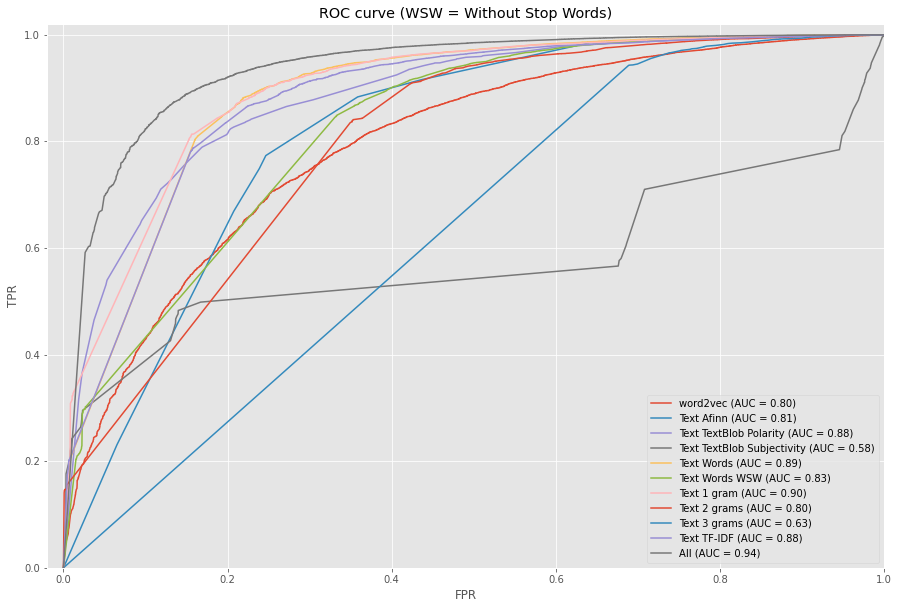

In [0]:
matplotlib.rc('figure', figsize=(15, 10))
plt.style.use('ggplot')
for f_name, result in results.items():
  auc = result['auc']
  plt.plot(result['roc_curve']['fpr'],
          result['roc_curve']['tpr'],
          label=f'{f_name} (AUC = {auc:.2f})')

plt.xlim([-0.02, 1.0])
plt.ylim([0., 1.02])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve (WSW = Without Stop Words)')
plt.legend()
plt.show()